In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
data=pd.read_csv('Books.csv')
data

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780000e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780000e+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780000e+12,eng,352,6333,244,11-01-2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780000e+12,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.780000e+12,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780000e+12,eng,635,783,56,12-01-1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780000e+12,eng,415,820,95,08-01-1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780000e+12,eng,434,769,139,2/27/2007,Ecco


In [3]:
#checking for missing values
data.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [4]:
#checking duplicate values
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11122    False
11123    False
11124    False
11125    False
11126    False
Length: 11127, dtype: bool

In [5]:
#removing the space before ' num_pages'
data.rename(columns={'  num_pages':'num_pages'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  float64
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [6]:
#change datatype from object to numeric
data['average_rating']=data['average_rating'].astype(float)
data['num_pages']=data['num_pages'].astype(int)

In [7]:
#change datatype from object to DateTime
date = pd.Series(data['publication_date'])
date = pd.to_datetime(date, errors='coerce')
data['publication_date'] = date

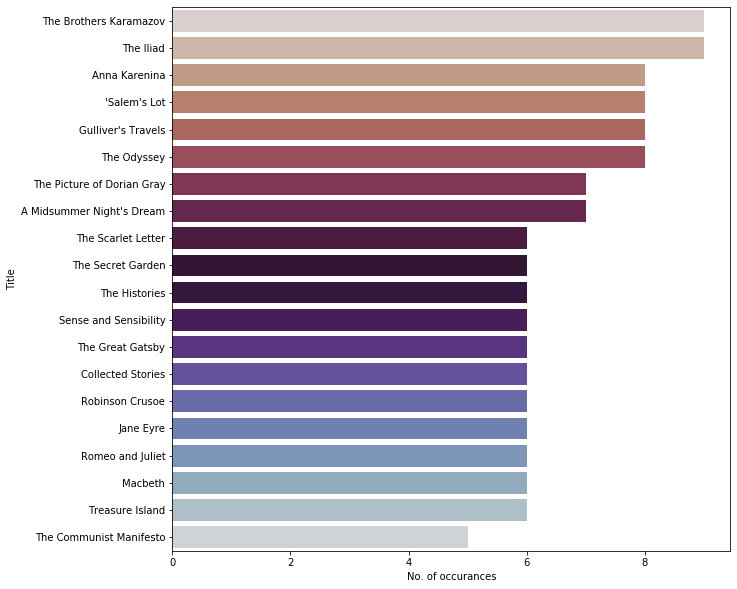

In [8]:
#Frequently occuring titles
title_count = data.groupby(['title'])[['bookID']].agg('count').reset_index()
title_count.rename(columns={'bookID':'count'}, inplace=True)
title_count = title_count.sort_values('count', ascending=False)
title_count = title_count.reset_index().drop(['index'], axis=1)
title_count = title_count.head(20)
plt.figure(figsize=(10,10))

x=title_count['count']
y=title_count['title']
ax = sns.barplot(x=x, y=y, palette='twilight_r')
ax.set_xlabel("No. of occurances")
ax.set_ylabel("Title")
plt.show()

In [9]:
#20 most rated books
most_rated = data[['title', 'ratings_count', 'publication_date']].sort_values('ratings_count', ascending = False).reset_index()
most_rated= most_rated.drop(['index'], axis=1)
most_rated= most_rated.head(20)
most_rated

,title,ratings_count,publication_date
0,Twilight (Twilight #1),4597666,2006-09-06
1,The Hobbit or There and Back Again,2530894,2002-08-15
2,The Catcher in the Rye,2457092,2001-01-30
3,Angels & Demons (Robert Langdon #1),2418736,2006-04-01
4,Harry Potter and the Prisoner of Azkaban (Harr...,2339585,2004-05-01
5,Harry Potter and the Chamber of Secrets (Harry...,2293963,1999-06-02
6,Harry Potter and the Order of the Phoenix (Har...,2153167,2004-09-01
7,The Fellowship of the Ring (The Lord of the Ri...,2128944,2003-09-05
8,Animal Farm,2111750,2003-05-06
9,Harry Potter and the Half-Blood Prince (Harry ...,2095690,2006-09-16


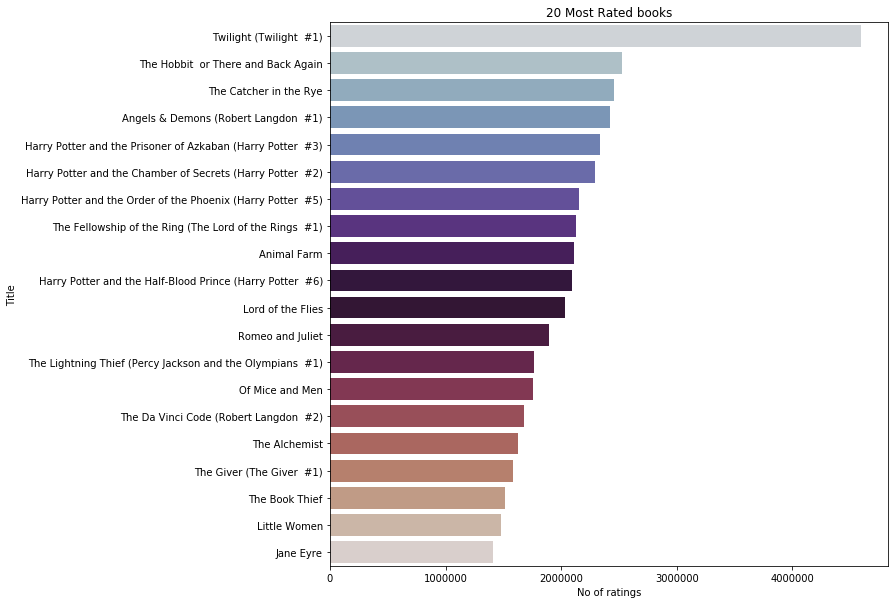

In [10]:
plt.figure(figsize=(10,10))
x=most_rated['ratings_count']
y=most_rated['title']
sns.barplot(x=x, y=y, palette='twilight')
plt.title("20 Most Rated books")
plt.xlabel("No of ratings")
plt.ylabel("Title")
plt.show()

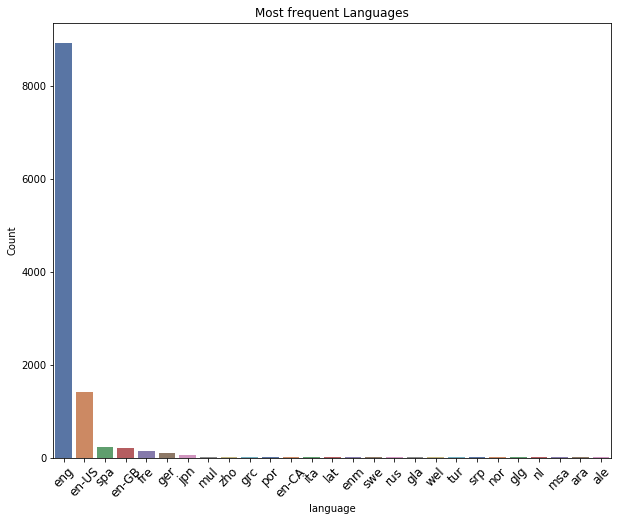

In [11]:
#most frequent language
lang = data.groupby(['language_code'])[['title']].agg('count')
lang = lang.rename(columns={'title':'count'}).reset_index()
lang = lang.sort_values('count', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x="language_code", y='count', data=lang, palette='deep')
plt.title("Most frequent Languages")
plt.xlabel("language")
plt.xticks(rotation=45,  horizontalalignment='center',fontweight='light',fontsize='12')
plt.ylabel("Count")
plt.show()

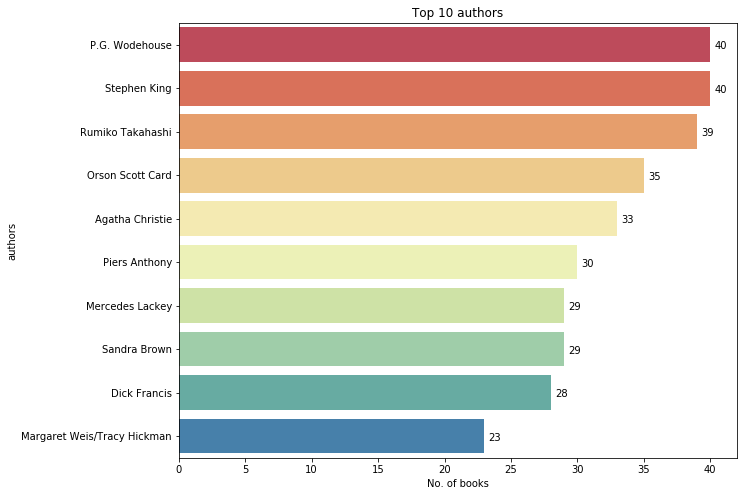

In [12]:
#top 10 authors
most_books = data.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(10,8))
ax = sns.barplot(most_books['title'], most_books.index, palette='Spectral')
ax.set_title("Top 10 authors")
ax.set_xlabel("No. of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

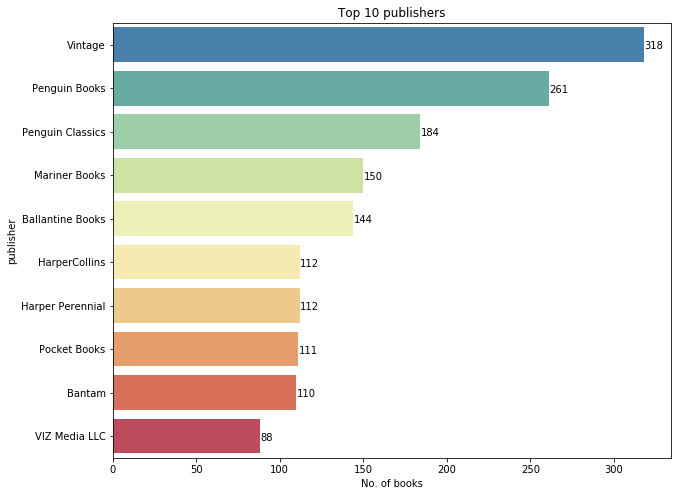

In [13]:
#top 10 publishers
most_books = data.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('publisher')
plt.figure(figsize=(10,8))
ax = sns.barplot(most_books['title'], most_books.index, palette='Spectral_r')
ax.set_title("Top 10 publishers")
ax.set_xlabel("No. of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

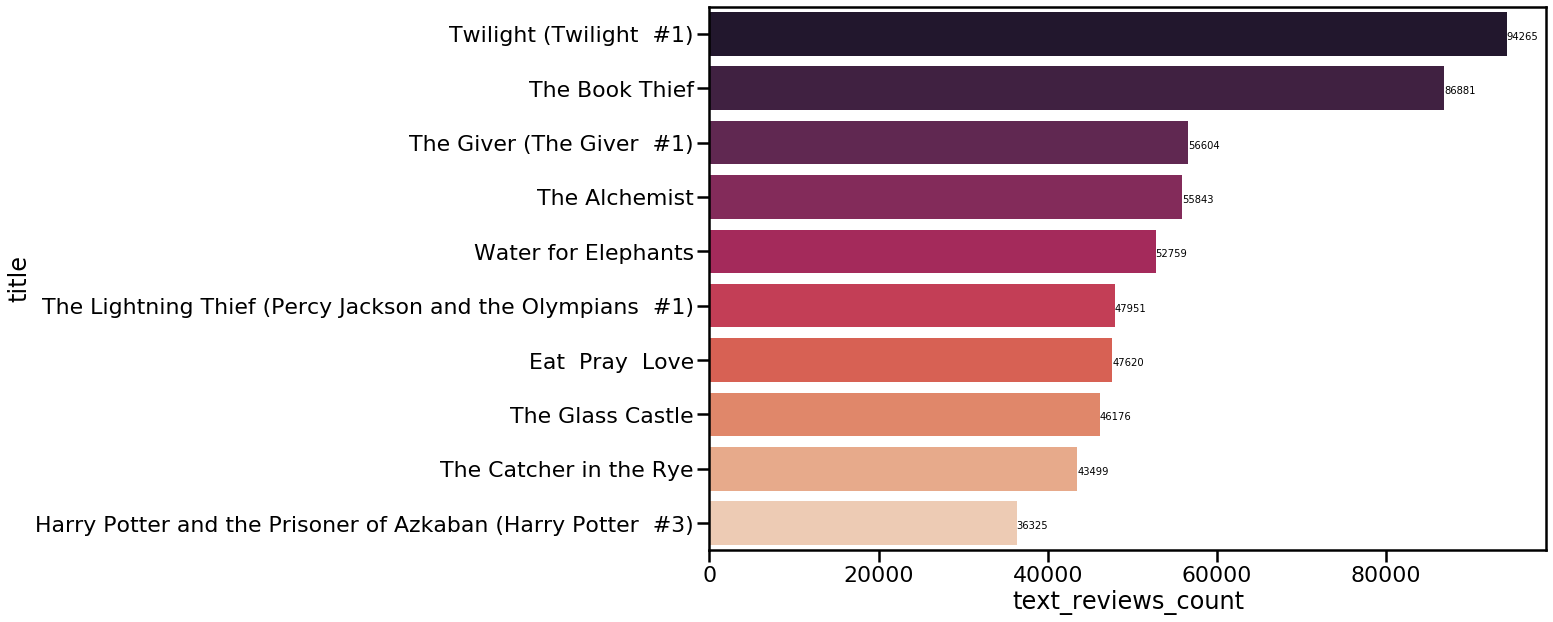

In [15]:
#books with hightest review count
most_text = data.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_text['text_reviews_count'], most_text.index, palette='rocket')
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
plt.show()

In [19]:
# books having rating above 4.5
best_rating = data.loc[data['average_rating']> 4.5]
print(f'Number of books: {best_rating.shape[0]}')
best_rating.head()

Number of books: 189


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780000e+12,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780000e+12,eng,2690,41428,164,2004-09-13,Scholastic
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9.780000e+12,eng,3342,28242,808,2005-09-12,Scholastic
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,345538374,9.780000e+12,eng,1728,101233,1550,2012-09-25,Ballantine Books


In [23]:
# books having rating below 1.5
worst_rating = data.loc[data['average_rating'] < 1.5]
print(f'Number of books: {worst_rating.shape[0]}')
worst_rating.head()

Number of books: 28


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
265,799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,1740592050,9.780000e+12,eng,295,0,0,2001-09-01,Lonely Planet
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.0,744005612,9.780000e+12,eng,112,0,0,2005-06-01,BradyGames
987,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,189044717X,9.780000e+12,eng,200,0,0,2000-10-13,Grove Press Open City Books
2532,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9.780000e+12,eng,228,0,0,2004-01-01,Frederick P. Lenz Foundation for American Budd...
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9.780000e+12,eng,304,0,0,2003-01-01,Frederick P. Lenz Foundation for American Budd...


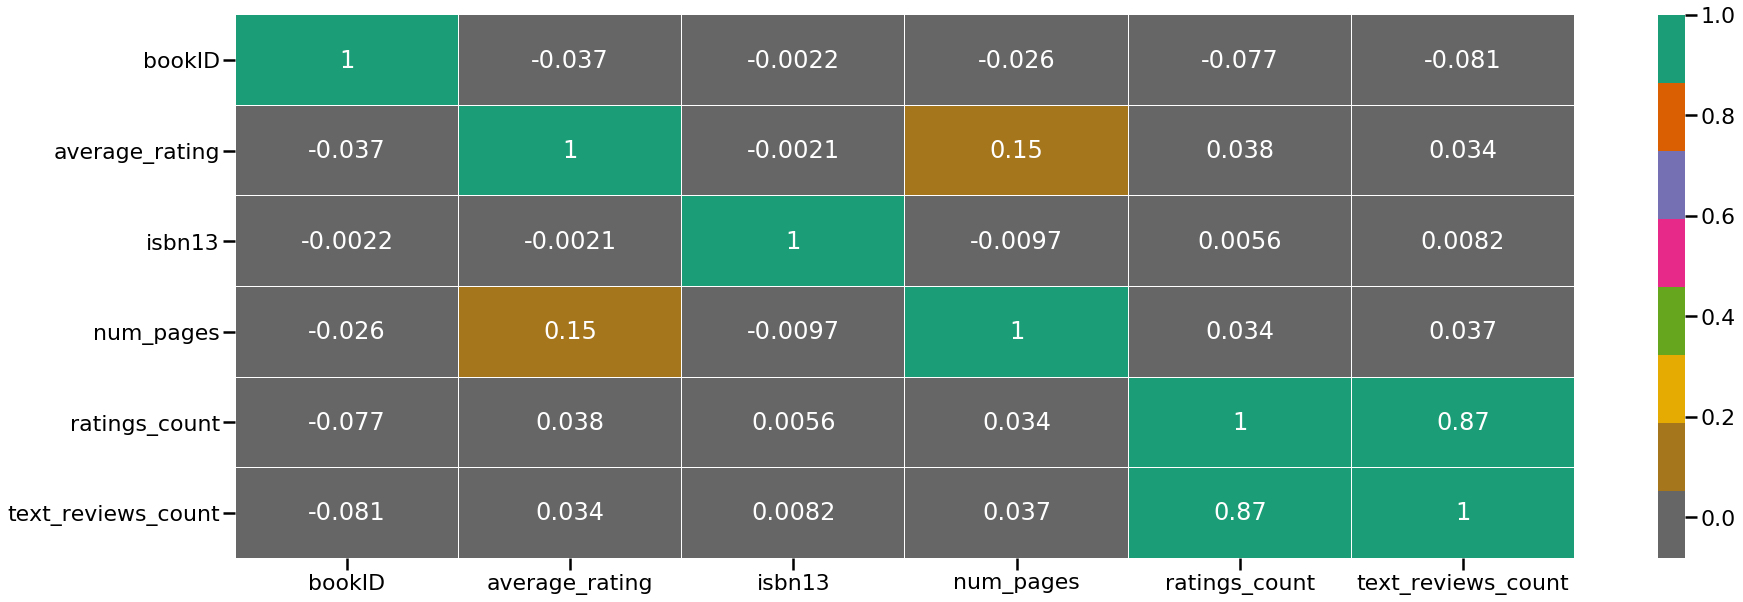

In [40]:
#correlation between the numeric variables
cor= data.corr()
f, ax = plt.subplots(figsize =(30, 10)) 
sns.heatmap(cor, ax = ax, cmap ="Dark2_r",annot=True, linewidths = 0.1) 

In [45]:
df=data.copy()

In [46]:
df.loc[ (df['average_rating'] >= 0) & (df['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df.loc[ (df['average_rating'] > 1) & (df['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df.loc[ (df['average_rating'] > 2) & (df['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df.loc[ (df['average_rating'] > 3) & (df['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df.loc[ (df['average_rating'] > 4) & (df['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [48]:
rating_df = pd.get_dummies(df['rating_between'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [50]:
l_code_df = pd.get_dummies(df['language_code'])
l_code_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
features = pd.concat([l_code_df, rating_df, df['average_rating'], df['ratings_count']], axis=1)
features.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,tur,wel,zho,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,average_rating,ratings_count
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4.57,2095690
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4.49,2153167
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4.42,6333
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4.56,2339585
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4.78,41428


In [64]:
#importing libraries for model building
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [55]:
#feature scaling
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [56]:
#fitting the model
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [62]:
#recommendor system
def book_recommendor(name):
    book_list = []
    book_id = df[df['title'] == name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list.append(df.loc[newid].title)
    return book_list

In [69]:
#output
book_name=input("Enter the book name:")
book_list = book_recommendor(book_name)
print('Recommended books:')
book_list

Enter the book name:A Short History of Nearly Everything
Recommended books:


['A Short History of Nearly Everything',
 'A Little Princess',
 'Dark Lover (Black Dagger Brotherhood  #1)',
 'I  Robot (Robot  #0.1)',
 'A Brief History of Time',
 'V for Vendetta']